In [105]:
import pandas as pd

data = pd.read_csv('../data/DATA_SSC_ONEPER_F.csv',encoding='euc-kr')
df = pd.DataFrame(data)
df.columns

Index(['소비년월', '고객거주지역', '연령성별', '직업', '추정소득', '일인가구여부', '고객수', 'CNT',
       'CNT_DAY_월', 'CNT_DAY_화', 'CNT_DAY_수', 'CNT_DAY_목', 'CNT_DAY_금',
       'CNT_DAY_토', 'CNT_DAY_일', 'CNT_DAY_평일', 'CNT_DAY_주말공휴일', 'CNT_TIME_A',
       'CNT_TIME_B', 'CNT_TIME_C', 'CNT_TIME_D', 'CNT_TIME_E', 'CNT_TIME_F',
       'CNT_TIME_G', 'CNT_TIME_H', 'CNT_TIME_I', 'CNT_TIME_J', 'CNT_가례',
       'CNT_가전', 'CNT_건강보조', 'CNT_골프장', 'CNT_공과금', 'CNT_관람', 'CNT_교육기타',
       'CNT_교통', 'CNT_놀이공원', 'CNT_대중교통', 'CNT_동물병원', 'CNT_마트할인점', 'CNT_면세점',
       'CNT_문구사무용품', 'CNT_배달앱', 'CNT_백화점', 'CNT_병원', 'CNT_보험', 'CNT_뷰티',
       'CNT_상품권', 'CNT_서적', 'CNT_쇼핑기타', 'CNT_숙박', 'CNT_스포츠시설', 'CNT_스포츠의류용품',
       'CNT_아울렛', 'CNT_여행상품', 'CNT_온라인쇼핑', 'CNT_유아교육', 'CNT_유흥', 'CNT_음식점',
       'CNT_의류', 'CNT_인테리어', 'CNT_정기결제', 'CNT_제과점', 'CNT_주류판매점', 'CNT_주생활관리',
       'CNT_주유', 'CNT_주차', 'CNT_차량관리', 'CNT_차량구매', 'CNT_취미', 'CNT_커피음료',
       'CNT_패션잡화', 'CNT_편의점', 'CNT_학교', 'CNT_학원', 'CNT_화장품'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254394 entries, 0 to 254393
Data columns (total 75 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   소비년월           254394 non-null  int64 
 1   고객거주지역         254394 non-null  object
 2   연령성별           254394 non-null  object
 3   직업             254394 non-null  object
 4   추정소득           254394 non-null  object
 5   일인가구여부         254394 non-null  object
 6   고객수            254394 non-null  int64 
 7   CNT            254394 non-null  int64 
 8   CNT_DAY_월      254394 non-null  int64 
 9   CNT_DAY_화      254394 non-null  int64 
 10  CNT_DAY_수      254394 non-null  int64 
 11  CNT_DAY_목      254394 non-null  int64 
 12  CNT_DAY_금      254394 non-null  int64 
 13  CNT_DAY_토      254394 non-null  int64 
 14  CNT_DAY_일      254394 non-null  int64 
 15  CNT_DAY_평일     254394 non-null  int64 
 16  CNT_DAY_주말공휴일  254394 non-null  int64 
 17  CNT_TIME_A     254394 non-null  int64 
 18  CNT_

## 어찌 되었던 시간 별 변화 추이를 보는게 우리 목적이었으니 시간 범주를 확인해보자!

In [94]:
# 다행히도 2019년도 12월부터 2021년도 5월까지 잘 정렬되어 있는 듯 하다.
# 시계열이니 계절별 추이를 보이는건 따로 고려해서 분석하긴 해야할 듯.
df['소비년월'].unique()

array([201912, 202001, 202002, 202003, 202004, 202005, 202012, 202101,
       202102, 202103, 202104, 202105])

## CNT_TIME 애들은 뭐하는 애들이얌...?

In [14]:
# CNT_TIME이 뭔지 확인 해보기

df_TIME = df[['CNT_TIME_A', 'CNT_TIME_B', 'CNT_TIME_C', 'CNT_TIME_D',
             'CNT_TIME_E', 'CNT_TIME_F', 'CNT_TIME_G', 'CNT_TIME_H', 'CNT_TIME_I', 'CNT_TIME_J']]

df_TIME.head()

,CNT_TIME_A,CNT_TIME_B,CNT_TIME_C,CNT_TIME_D,CNT_TIME_E,CNT_TIME_F,CNT_TIME_G,CNT_TIME_H,CNT_TIME_I,CNT_TIME_J
0,224,16,62,130,160,124,118,131,113,50
1,130,27,57,122,159,144,152,139,125,73
2,323,10,71,81,150,127,150,118,72,27
3,152,13,50,111,173,193,159,110,109,59
4,117,15,71,133,180,130,119,142,142,82


##  데이터 타입이 object 인거 확인하기

In [19]:
df_check_obj = df[['고객거주지역', '연령성별', '직업', '추정소득', '일인가구여부']]
df_check_obj.head()

,고객거주지역,연령성별,직업,추정소득,일인가구여부
0,경기 파주시,B,D.공무원,D,X
1,대전 서구,D,E.교육인,A,X
2,경기 의왕시,B,D.공무원,C,X
3,경남 거창군,E,F.자영업자,B,X
4,광주 북구,A,D.공무원,B,X


In [25]:
# 구 단위까지 쪼개는게 의미가 있나? 하는 마음
# 일단 지역구로 나누는건 가능하겠다!

df['고객거주지역'].unique()

array(['경기 파주시', '대전 서구', '경기 의왕시', '경남 거창군', '광주 북구', '세종', '대구 북구',
       '강원 춘천시', '부산 남구', '경기 평택시', '경기 부천시', '인천 남구', '대구 남구', '강원 원주시',
       '대전 동구', '경기 양주시', '대구 서구', '경남 양산시', '경기 안성시', '울산 남구', '경기 군포시',
       '광주 남구', '부산 북구', '경남 사천시', '경기 포천시', '광주 동구', '광주 서구', '경기 시흥시',
       '경기 오산시', '대전 중구', '울산 중구', '인천 서구', '강원 삼척시', '대구 중구', '경남 진주시',
       '경기 하남시', '대구 동구', '경기 광명시', '강원 강릉시', '울산 북구', '경기 구리시', '경기 김포시',
       '강원 홍천군', '인천 중구', '경기 가평군', '경기 광주시', '경기 이천시', '강원 인제군',
       '경남 고성군', '경남 밀양시', '경기 과천시', '경남 김해시', '부산 중구', '경기 양평군', '서울 중구',
       '부산 동구', '경기 화성시', '강원 철원군', '강원 동해시', '경남 산청군', '부산 서구', '울산 동구',
       '인천 동구', '경남 거제시', '강원 횡성군', '강원 화천군', '경기 여주시', '강원 속초시',
       '강원 평창군', '강원 정선군', '경기 연천군', '강원 양구군', '강원 양양군', '경남 남해군',
       '경남 의령군', '강원 태백시', '강원 영월군', '경남 하동군', '경남 함안군', '경남 함양군',
       '경남 창녕군', '경남 통영시', '경남 합천군', '경북 경산시', '경북 문경시', '경북 영덕군',
       '경북 봉화군', '경북 영천시', '경북 의성군', '경북 고령군', '대구 달서구', '경북 안동시',
       '경북 구

In [104]:
print(df['일인가구여부'][df['일인가구여부']=='X'].count())
print(df['일인가구여부'][df['일인가구여부']=='O'].count())

189251
65143


In [33]:
# 대부분의 조사 값이 대도시에 모여있다
df['고객거주지역'].value_counts().shape # (254, )
df['고객거주지역'].value_counts().head(20)

서울 강남구        2521
서울 송파구        2392
서울 서초구        2326
경기 성남시 분당구    2190
대전 서구         2116
대구 수성구        2111
경기 화성시        2100
부산 해운대구       2014
대전 유성구        1981
경기 용인시 기흥구    1939
서울 양천구        1909
서울 관악구        1905
서울 강서구        1900
충남 천안시 서북구    1900
경기 남양주시       1886
서울 동작구        1884
경기 평택시        1868
서울 마포구        1861
서울 영등포구       1860
대구 달서구        1841
Name: 고객거주지역, dtype: int64

In [93]:
# 그러면 앞단어 하나로만 unique 찍어보면 어떨까

locations = list(df['고객거주지역'].unique())

loca_dict = {}
for location in locations:
    area = location[:2]
    if area not in loca_dict:
        loca_dict[area] = 1
    else:
        loca_dict[area] += 1
        
print(loca_dict)

{'경기': 45, '대전': 5, '경남': 22, '광주': 5, '세종': 1, '대구': 8, '강원': 18, '부산': 16, '인천': 11, '울산': 5, '서울': 25, '경북': 24, '전남': 22, '충남': 16, '전북': 15, '제주': 2, '충북': 14}


In [37]:
# 각각이 어떤 항목을 의미하는지 알 수 없구만...ㅋㅋㅋㅋㅋ
df['연령성별'].value_counts() 

B    63242
E    54810
A    40906
C    37942
D    30592
F    26902
Name: 연령성별, dtype: int64

In [40]:
# 흔히 말하는 안정적인 직업군과 그렇지 않은 직업군의 소비 변화 비교도 해보면 좋겠다. + 소득과 직업군과의 연관성을 고려하면서!
df['직업'].value_counts()

C.회사원(일반)     80072
J.기타          60544
F.자영업자        44366
B.회사원(대기업)    28066
D.공무원         22487
E.교육인         15504
A.전문직          3355
Name: 직업, dtype: int64

In [ ]:
# 취미 소비 항목(뷰티, 서적, 운동 등등)을 찾아서 비교 해도 재미있겠다!

In [280]:
kinds_df =  df[['소비년월',
             'CNT_가례', 'CNT_가전', 'CNT_건강보조', 'CNT_골프장', 'CNT_공과금', 'CNT_관람', 'CNT_교육기타',
            'CNT_교통', 'CNT_놀이공원', 'CNT_대중교통', 'CNT_동물병원', 'CNT_마트할인점', 'CNT_면세점',
            'CNT_문구사무용품', 'CNT_배달앱', 'CNT_백화점', 'CNT_병원', 'CNT_보험', 'CNT_뷰티',
            'CNT_상품권', 'CNT_서적', 'CNT_쇼핑기타', 'CNT_숙박', 'CNT_스포츠시설', 'CNT_스포츠의류용품',
            'CNT_아울렛', 'CNT_여행상품', 'CNT_온라인쇼핑', 'CNT_유아교육', 'CNT_유흥', 'CNT_음식점',
            'CNT_의류', 'CNT_인테리어', 'CNT_정기결제', 'CNT_제과점', 'CNT_주류판매점', 'CNT_주생활관리',
            'CNT_주유', 'CNT_주차', 'CNT_차량관리', 'CNT_차량구매', 'CNT_취미', 'CNT_커피음료',
            'CNT_패션잡화', 'CNT_편의점', 'CNT_학교', 'CNT_학원', 'CNT_화장품']]

sobi = kinds_df.groupby(by=["소비년월"]).sum()
sobi_2020 = sobi[:6].reset_index()
sobi_2021 = sobi[6:].reset_index()
sobi_cha = sobi_2021 - sobi_2020
sobi_cha

,소비년월,CNT_가례,CNT_가전,CNT_건강보조,CNT_골프장,CNT_공과금,CNT_관람,CNT_교육기타,CNT_교통,CNT_놀이공원,...,CNT_주차,CNT_차량관리,CNT_차량구매,CNT_취미,CNT_커피음료,CNT_패션잡화,CNT_편의점,CNT_학교,CNT_학원,CNT_화장품
0,100,-6344,1880,-608811,-1724,-6429,-297784,-48076,-589704,-42558,...,-92095,-1506,272,-396031,-937779,-53515,-567350,-1482,-91496,-139565
1,100,-2989,44960,-297520,-11723,-7180,-162793,-923,-539303,-14201,...,-30219,14561,534,-297101,-344990,-15113,283571,-707,-18821,-65834
2,100,-1850,36473,-223603,13731,35897,-34310,944,-47114,9611,...,16928,327,142,-123617,162085,2517,372735,-842,1018,-27223
3,100,-1435,47463,-284017,24411,30709,12643,4140,209189,4784,...,72574,16265,804,-28585,489196,16510,960671,342,37967,13045
4,100,1389,30102,-241001,12010,34455,16892,4013,132375,16447,...,60014,13715,1150,-42780,475526,12627,1105106,-205,13349,8712
5,100,696,18382,-359173,7312,32391,31636,-527,37080,16597,...,32805,-7560,108,-51757,280640,-8117,736260,-58,7160,-28121


In [265]:
import matplotlib.pyplot as plt
import numpy as np

indexs = sobi_2020.columns
year_index = ["201912", "202001", "202002", "202003", "202004", "202005"]
for index in indexs:
    new = sobi_2020[[index]].values[:]
    new = list(new.reshape(-1))
    print(new)

[201912, 202001, 202002, 202003, 202004, 202005]
[8807, 5217, 4287, 4351, 3196, 4020]
[263493, 228466, 223281, 233729, 244032, 270353]
[1578762, 1169229, 1074358, 1293691, 1279089, 1384097]
[62237, 58776, 67417, 102701, 129325, 148363]
[239490, 276516, 133630, 154514, 135981, 140261]
[307405, 174223, 58594, 13101, 6534, 13781]
[71387, 23974, 21647, 20452, 21851, 24513]
[1003190, 971959, 528955, 331066, 430016, 596222]
[44042, 17008, 3191, 6161, 7503, 18466]
[6512150, 5233899, 4501033, 3825968, 4005497, 3491017]
[55730, 42030, 36427, 41490, 43507, 50651]
[8354748, 6791691, 6179050, 6841845, 6794444, 7329250]
[62194, 46430, 14998, 1899, 888, 2448]
[145211, 66639, 54329, 54146, 57480, 77230]
[1124882, 786658, 814319, 971389, 916514, 912013]
[813395, 538533, 369545, 315538, 420188, 535581]
[2002488, 1410844, 1158122, 1048013, 1108119, 1226908]
[867858, 842292, 817244, 865317, 846660, 870444]
[288071, 216930, 179202, 179392, 199945, 247504]
[1293, 539, 439, 427, 565, 524]
[202619, 131940, 1

In [267]:
indexs = sobi_2021.columns
year_index = ["202012", "202101", "202102", "202103", "202104", "202105"]
for index in indexs:
    new = sobi_2021[[index]].values[:]
    x2 = list(new.reshape(-1))
    print(new)

[202012, 202101, 202102, 202103, 202104, 202105]
[2463, 2228, 2437, 2916, 4585, 4716]
[265373, 273426, 259754, 281192, 274134, 288735]
[969951, 871709, 850755, 1009674, 1038088, 1024924]
[60513, 47053, 81148, 127112, 141335, 155675]
[233061, 269336, 169527, 185223, 170436, 172652]
[9621, 11430, 24284, 25744, 23426, 45417]
[23311, 23051, 22591, 24592, 25864, 23986]
[413486, 432656, 481841, 540255, 562391, 633302]
[1484, 2807, 12802, 10945, 23950, 35063]
[2949893, 2820665, 2976506, 3370862, 3376242, 3512623]
[48832, 46532, 43162, 53278, 54206, 59941]
[7184122, 6939491, 6486419, 6987815, 7053731, 7580521]
[3234, 1894, 4468, 6278, 7569, 7093]
[74179, 59449, 56220, 94360, 74123, 75182]
[1827085, 1969090, 1721496, 1851980, 1871649, 2095337]
[465666, 437751, 446634, 525528, 502861, 566512]
[1256460, 1154664, 1112270, 1361082, 1348475, 1296161]
[871200, 840920, 850767, 910947, 891491, 901735]
[188247, 191930, 197216, 226020, 221720, 242443]
[340, 271, 303, 311, 233, 366]
[125470, 146341, 11564

# 머리가 나빴던 석영의 EDA 노가다

<BarContainer object of 6 artists>

/home/sydney/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sydney/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sydney/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sydney/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 47168 missing from current font.
  font.set_text(s, 0, flags=flags)


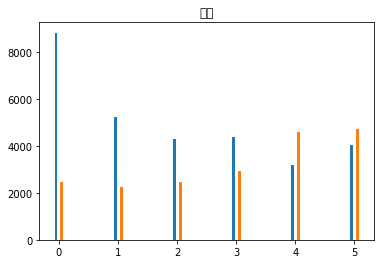

In [276]:
# CNT_가례

x1 = ["12월", "1월", "2월", "3월", "4월", "5월"]
y1 = [8807, 5217, 4287, 4351, 3196, 4020]
x = np.arange(len(x1))

x2 = ["12월", "1월", "2월", "3월", "4월", "5월"]
y2 = [2463, 2228, 2437, 2916, 4585, 4716]
plt.title("가례")
plt.bar(x-0.05, y1, width = 0.05)
plt.bar(x+0.05, y2, width = 0.05)

<BarContainer object of 6 artists>

/home/sydney/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sydney/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sydney/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/sydney/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0, flags=flags)


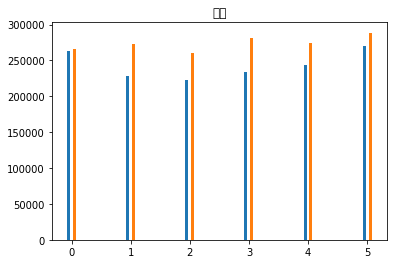

In [277]:
# CNT_가전

x1  =["12월", "1월", "2월", "3월", "4월", "5월"]
y1 = [263493, 228466, 223281, 233729, 244032, 270353]
x = np.arange(len(x1))

x2 = ["12월", "1월", "2월", "3월", "4월", "5월"]
y2 = [265373, 273426, 259754, 281192, 274134, 288735]
plt.title("가전")
plt.bar(x-0.05, y1, width = 0.05)
plt.bar(x+0.05, y2, width = 0.05)

In [ ]:
# CNT_가전

x1  =["12월", "1월", "2월", "3월", "4월", "5월"]
y1 = [263493, 228466, 223281, 233729, 244032, 270353]
x = np.arange(len(x1))

x2 = ["12월", "1월", "2월", "3월", "4월", "5월"]
y2 = [265373, 273426, 259754, 281192, 274134, 288735]
plt.title("가전")
plt.bar(x-0.05, y1, width = 0.05)
plt.bar(x+0.05, y2, width = 0.05)